# **1. Packages**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import  accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
import preprocess as p

# **2. Functions**

In [ ]:
def train_mlp(train_X, train_y): 

  MLP = MLPClassifier(activation = 'relu', solver = 'adam')

  # To Select the best number of units in the middle hidden layer and the max_iter (epochs)
  param_grid = dict(hidden_layer_sizes = [16,32,64], max_iter = [10,15,20,50])

  # cv is the cross validation
  GridSearch = GridSearchCV(MLP, param_grid = param_grid, scoring = accuracy_score, cv = 10)

  GridSearch.fit(train_X, train_y)

  best_model = GridSearch.best_estimator_

  return best_model
  

In [ ]:
def train(train_X, train_y): 

  XGB = XGBClassifier(eval_metric = "logloss", early_stopping_rounds = 10)

  # To Select the best learning rate and n_estimators (epochs)
  param_grid = dict(learning_rate = [1e-2, 1e-3, 1e-4], n_estimators = [10,15,20,50])

  # cv is the cross validation
  GridSearch = GridSearchCV(XGB, param_grid = param_grid, scoring = accuracy_score, cv = 10)

  GridSearch.fit(train_X, train_y, eval_set=[(train_X, train_y)], verbose=False)

  best_model = GridSearch.best_estimator_

  return best_model


In [ ]:
def predict_evalute(test_X,test_y, model):
  
  # Predict 
  pred_y = model.predict(test_X)

  print("Accuracy:", "{:.8f}".format(accuracy_score(test_y, pred_y)), "\n")

  print("F1 Score:", "{:.8f}".format(f1_score(test_y, pred_y)),'\n')

  print("Confusion matrix:\n\n",confusion_matrix(test_y, pred_y)) 


# **3. Loading and Preprocessing the Dataset**

In [ ]:
path_to_data="BankChurners1.csv"

# loading dataset
data = pd.read_csv(path_to_data)

# removing Nan if any in dataset
data = data.dropna() 

preprocessData = p.preprocess_data(data)

train_X, test_X, train_y, test_y = p.split(preprocessData)

# **4. Main**

-------------------Loss curve, Accuracy, F1 Score, and Confusion matrix for MLP model-------------------


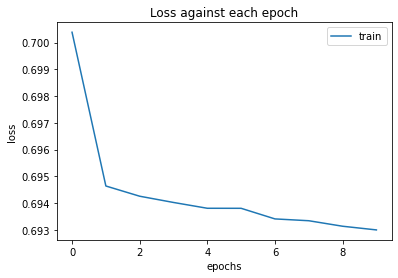

Accuracy: 0.51924975 

F1 Score: 0.53751187 

Confusion matrix:

 [[486 543]
 [431 566]]
--------------------------------------------------------------------------------------------------------


--------------Loss curve, Accuracy, F1 Score, and Confusion matrix for the chosen model--------------


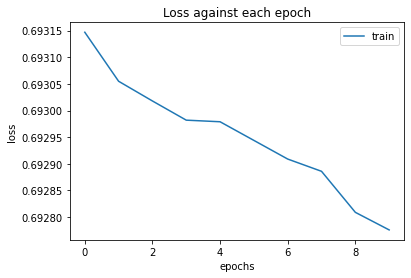

Accuracy: 0.49210267 

F1 Score: 0.65893271 

Confusion matrix:

 [[   3 1026]
 [   3  994]]
----------------------------------


In [ ]:
MLP_best_model = train_mlp(train_X, train_y)

print("-------------------Loss curve, Accuracy, F1 Score, and Confusion matrix for MLP model-------------------")

# Plot the loss against each epochs
plt.plot(MLP_best_model.loss_curve_)
plt.title("Loss against each epoch")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train'], loc='upper right')
plt.show()

# Predict & evalute
predict_evalute(test_X, test_y, MLP_best_model)

print("--------------------------------------------------------------------------------------------------------\n\n")


best_model = train(train_X, train_y)

print("--------------Loss curve, Accuracy, F1 Score, and Confusion matrix for the chosen model--------------")

# Plot the loss against each epochs
results = best_model.evals_result()
plt.plot(results['validation_0']['logloss'])
plt.title("Loss against each epoch")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train'], loc='upper right')
plt.show()

# Predict & evalute
predict_evalute(test_X, test_y, best_model)

print("----------------------------------")


